In [2]:
# Python Project 2
# Portion by Alexander Herring
# Foregin aid data from US AID, https://explorer.usaid.gov/data.html#tab-data-download
# GDP data from World Bank, https://data.worldbank.org/indicator/NY.GDP.MKTP.CD?view=chart

#Question 1: What are the high level U.S. foreign aid spending trends?
#Historic Trends in US Foreign Aid spending
#150 account levels compared to overall US budget
#Annual spending levels from the 150 account
#Annual spending levels by agency from 150 account
#Annual spending levels by category from 150 account
#Military vs. economic spending
#Recipient countries (ranked)

In [1]:
# Import packages and choose settings

import datetime as dt
import matplotlib.dates as mdates
import pandas as pd
import numpy as np
pd.options.display.float_format = "${:,.2f}".format
import matplotlib.pyplot as plt
plt.style.use("ggplot")
from functools import partial
from numbers import Number

In [2]:
# Import the data

us_for_aid = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\us_foreign_aid_complete.csv", index_col = False)
us_for_aid_df = pd.DataFrame(us_for_aid)
gdp_world = pd.read_csv("C:\\Users\\Alex\\Desktop\\Python Project 2\\API_NY.GDP.MKTP.CD_DS2_en_csv_v2.csv", skiprows = 4, index_col = False)
gdp_world_df = pd.DataFrame(gdp_world)
print(gdp_world_df)
gdp_world_df.head()
fhfawb_pickle = pd.read_pickle("C:\\Users\\Alex\\Desktop\\Python Project 2\\fhfawb.pickle")
#print(fhfawb_pickle.type())

fhfawb_pickle_df = pd.DataFrame(fhfawb_pickle)

print(fhfawb_pickle_df)
fhfawb_pickle_df.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (42) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


                                          Country Name Country Code  \
0                                                Aruba          ABW   
1                                          Afghanistan          AFG   
2                                               Angola          AGO   
3                                              Albania          ALB   
4                                              Andorra          AND   
5                                           Arab World          ARB   
6                                 United Arab Emirates          ARE   
7                                            Argentina          ARG   
8                                              Armenia          ARM   
9                                       American Samoa          ASM   
10                                 Antigua and Barbuda          ATG   
11                                           Australia          AUS   
12                                             Austria          AUT   
13    

        FH_Score  year      country FH_value       date     gdppc  gini   nat  \
0             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
1             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
2             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
3             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
4             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
5             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
6             PR  1972  Afghanistan        4 1972-01-01      $nan  $nan $0.40   
7             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
8             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
9             CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
10            CL  1972  Afghanistan        5 1972-01-01      $nan  $nan $0.40   
11            CL  1972  Afgh

,FH_Score,year,country,FH_value,date,gdppc,gini,nat,pop,voice,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
0,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$18,600,000.00","$84,188,676.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
1,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,600,000.00","$29,873,401.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
2,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,100,000.00","$27,610,265.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
3,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$3,000,000.00","$13,578,819.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
4,PR,1972,Afghanistan,4,1972-01-01,$nan,$nan,$0.40,"$11,721,940.00",$nan,...,NaN,NaN,$2.00,Obligations,"$1,300,000.00","$5,884,155.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00


In [4]:
# Clean data

us_for_aid_df["constant_amount"] = us_for_aid_df["constant_amount"].astype(float)
us_for_aid_df["fiscal_year"] = us_for_aid_df["fiscal_year"].astype(str)
# Relabeling years coded as "1976tq" to 1976
us_for_aid_df_adj = us_for_aid_df.copy()
us_for_aid_df_adj.loc[:, "fiscal_year"].replace("1976tq", "1976", inplace=True)
us_for_aid_df_adj["fiscal_year"] = us_for_aid_df_adj["fiscal_year"].astype(int)
us_for_aid_df_adj["fiscal_year"] = pd.to_datetime(us_for_aid_df_adj["fiscal_year"], format='%Y')

#gdp_world_us = pd.DataFrame(gdp_world["Country Code" == "USA"])
#gdp_world_df["Country Code"] == "USA"
gdp_us_df = gdp_world_df.loc[gdp_world_df["Country Code"].str.contains(r"USA"), ].copy()
print(gdp_us_df)

# Get summary of data
#print(us_for_aid_df_adj.head())
#print(us_for_aid_df_adj)
#us_for_aid_df_adj.fiscal_year.unique()
# Track high-level trends

      Country Name Country Code     Indicator Name  Indicator Code  \
249  United States          USA  GDP (current US$)  NY.GDP.MKTP.CD   

                   1960                1961                1962  \
249 $543,300,000,000.00 $563,300,000,000.00 $605,100,000,000.00   

                   1963                1964                1965     ...       \
249 $638,600,000,000.00 $685,800,000,000.00 $743,700,000,000.00     ...        

                      2009                   2010                   2011  \
249 $14,418,739,000,000.00 $14,964,372,000,000.00 $15,517,926,000,000.00   

                      2012                   2013                   2014  \
249 $16,155,255,000,000.00 $16,691,517,000,000.00 $17,393,103,000,000.00   

                      2015                   2016  2017  Unnamed: 62  
249 $18,036,648,000,000.00 $18,569,100,000,000.00  $nan         $nan  

[1 rows x 63 columns]


In [5]:
# Highest-level dataframe information

us_for_aid_df_adj.columns

Index(['country_id', 'country_code', 'country_name', 'region_id',
       'region_name', 'income_group_id', 'income_group_name',
       'income_group_acronym', 'implementing_agency_id',
       'implementing_agency_acronym', 'implementing_agency_name',
       'implementing_subagency_id', 'subagency_acronym', 'subagency_name',
       'channel_category_id', 'channel_category_name',
       'channel_subcategory_id', 'channel_subcategory_name', 'channel_id',
       'channel_name', 'dac_category_id', 'dac_category_name',
       'dac_sector_code', 'dac_sector_name', 'dac_purpose_code',
       'dac_purpose_name', 'funding_account_id', 'funding_account_name',
       'funding_agency_id', 'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id',
       'activity_name', 'activity_project_number', 'activity_start_date',
       'activity_end_date', 'transaction_type_id', 'transaction_t

In [6]:
us_for_aid_df_adj.shape

(901977, 48)

In [7]:
# Function code I found to format as percent

def as_percent(v, precision='0.2'):  
    """Convert number to percentage string."""
    if isinstance(v, Number):
        return "{{:{}%}}".format(precision).format(v)
    else:
        raise TypeError("Numeric type required")

In [8]:
# Aid Received by Region
region_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("region_name").constant_amount.sum().sort_values(ascending = False))
region_const_amt.reset_index(inplace = True)
region_const_amt.columns = ["Region Name", "Aid in Contsant Dollars"]

region_const_amt.head(10)

#print(region_const_amt.columns)
#region_const_amt["constant_amount"]
#type(region_const_amt["constant_amount"])
#type(region_const_amt["constant_amount"][2])




,Region Name,Aid in Contsant Dollars
0,Middle East and North Africa,"$727,287,462,690.00"
1,Europe and Eurasia,"$580,471,010,787.00"
2,World,"$533,062,973,692.00"
3,East Asia and Oceania,"$416,958,627,314.00"
4,South and Central Asia,"$402,860,265,873.00"
5,Sub-Saharan Africa,"$331,028,159,679.00"
6,Western Hemisphere,"$221,937,873,991.00"


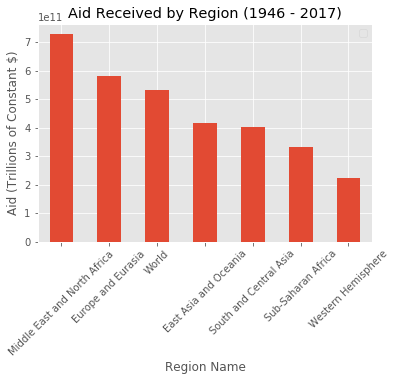

In [9]:
fig = region_const_amt.plot.bar(x = "Region Name", y = "Aid in Contsant Dollars")
plt.title("Aid Received by Region (1946 - 2017)")
plt.xlabel("Region Name")
plt.xticks(rotation = 45)
plt.ylabel("Aid (Trillions of Constant $)")
plt.legend("")
plt.show()
#plt.tick_params(labelsize=14)
#format()
#fig.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

#ax.yaxis.set_major_formatter(FormatStrFormatter('.2f'))
#set_major_formatter(mtick.FormatStrFormatter('%.0e')) 

#ax.get_yaxis().set_major_formatter(
    #matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) * 1000, ',')))

In [10]:
# Donations Received by Country
country_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("country_name").constant_amount.sum().sort_values(ascending = False))

#country_const_amt.rename(columns={"country_name": "Country Name"}, inplace=True)

country_const_amt.reset_index(inplace = True)
country_const_amt.columns = ["Country Name", "Aid in Contsant Dollars"]
country_const_amt.head(10)

#fig = country_const_amt.plot.bar(x = "country_name", y = "constant_amount")
#plt.title("Donations Received by Country")
#plt.xlabel("Region Name")
#plt.xticks(rotation = 45)
#plt.ylabel("Amount (Constant $)")
#plt.legend("")
#plt.tick_params(labelsize=14)
#format()
#fig.yaxis.set_major_formatter(FormatStrFormatter('%.0e'))

#ax.yaxis.set_major_formatter(FormatStrFormatter('.2f'))
#set_major_formatter(mtick.FormatStrFormatter('%.0e')) 

#ax.get_yaxis().set_major_formatter(
    #matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x) * 1000, ',')))



# maybe low, middle, high income countries


#add yoy here, useful for graph

,Country Name,Aid in Contsant Dollars
0,World,"$507,538,246,048.00"
1,Israel,"$273,907,061,746.00"
2,Afghanistan,"$208,858,862,401.00"
3,Egypt,"$164,260,077,581.00"
4,Iraq,"$143,146,172,940.00"
5,Vietnam (former South),"$121,379,497,371.00"
6,Korea Republic,"$79,972,851,743.00"
7,Pakistan,"$79,177,016,069.00"
8,United Kingdom,"$73,672,609,328.00"
9,India,"$71,179,112,268.00"


In [36]:
# Donations Received by Year
year_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("fiscal_year").constant_amount.sum().sort_values(ascending = False))
year_const_amt.reset_index(inplace = True)
year_const_amt = year_const_amt.sort_values(by = "fiscal_year", ascending = False)
year_const_amt.columns = ["Year", "Aid in Contsant Dollars"]
year_const_amt = year_const_amt.reset_index(drop = True)

year_const_amt["Aid % Change"] = year_const_amt["Aid in Contsant Dollars"] / year_const_amt["Aid in Contsant Dollars"].shift(-1) - 1
year_const_amt["Aid % Change"] = year_const_amt["Aid % Change"].apply(as_percent)



year_const_amt.head(20)
#year_const_amt = year_const_amt.sort_values(by = "fiscal_year", ascending = True)

#year_const_amt["fiscal_year"] = mdates.date2num(year_const_amt["fiscal_year"].to_pydatetime())


#year_const_amt.sort_index(inplace = True, ascending = False)
#print(year_const_amt)



#fig, ax = plt.subplots()
#fig = year_const_amt.plot.bar(x = "fiscal_year", y = "constant_amount")
#plt.title("Donations Received by Year")
#plt.xlabel("Region Name")
#plt.xticks(rotation = 45)
#plt.ylabel("Amount (Constant $)")
#plt.legend("")
#plt.locator_params(axis='x', nticks=10)





#myLocator = plt.MultipleLocator(4)
#fig.xaxis.set_major_locator(myLocator)
#fig.xaxis_date() 
#fig.autofmt_xdate()
#plt.show()


#fig, ax = plt.subplots()
#ax.plot(year_const_amt["fiscal_year"], year_const_amt["constant_amount"])
#ax.xaxis_date()     # interpret the x-axis values as dates
#fig.autofmt_xdate() # make space for and rotate the x-axis tick labels
#plt.show()

,Year,Aid in Contsant Dollars,Aid % Change
0,2017-01-01,"$42,956,942,659.00",-54.72%
1,2016-01-01,"$94,861,916,152.00",-2.46%
2,2015-01-01,"$97,256,512,607.00",12.59%
3,2014-01-01,"$86,379,601,030.00",-9.70%
4,2013-01-01,"$95,654,851,269.00",-6.41%
5,2012-01-01,"$102,204,936,149.00",-1.59%
6,2011-01-01,"$103,854,284,297.00",4.27%
7,2010-01-01,"$99,601,451,691.00",-1.88%
8,2009-01-01,"$101,506,402,048.00",1.52%
9,2008-01-01,"$99,988,680,940.00",16.93%


In [12]:
# Agency Funding Aid
agency_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("funding_agency_name").constant_amount.sum().sort_values(ascending = False))
agency_const_amt.reset_index(inplace = True)
agency_const_amt.columns = ["Agency Funding the Aid", "Aid in Contsant Dollars"]
agency_const_amt.head()
#print(agency_const_amt)

,Agency Funding the Aid,Aid in Contsant Dollars
0,U.S. Agency for International Development,"$1,051,522,363,801.00"
1,Department of Defense,"$773,145,770,324.00"
2,Department of State,"$315,244,267,992.00"
3,Department of Agriculture,"$289,128,915,466.00"
4,Unknown - Historical Greenbook,"$218,156,694,759.00"


In [19]:
# Category of Aid
aid_cat_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("assistance_category_name").constant_amount.sum().sort_values(ascending = False))
aid_cat_const_amt.reset_index(inplace = True)
aid_cat_const_amt.columns = ["Category of Aid", "Aid in Contsant Dollars"]
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Aid in Contsant Dollars"] / aid_cat_const_amt["Aid in Contsant Dollars"].sum()
aid_cat_const_amt["Percent of Total"] = aid_cat_const_amt["Percent of Total"].apply(as_percent)
aid_cat_const_amt.head()

,Category of Aid,Aid in Contsant Dollars,Percent of Total
0,Economic,"$2,157,055,102,518.00",67.12%
1,Military,"$1,056,551,271,508.00",32.88%


In [ ]:
# Name for Aid
aid_name_const_amt = pd.DataFrame(us_for_aid_df_adj.groupby("activity_name").constant_amount.sum().sort_values(ascending = False))
aid_name_const_amt.reset_index(inplace = True)
aid_name_const_amt.columns = ["Activity Benefiting from Aid", "Aid in Contsant Dollars"]
aid_name_const_amt.head()

In [ ]:
# Track Transaction Types
transac_type_const_amt = us_for_aid_df.groupby("transaction_type_name").constant_amount.sum().sort_values(ascending = False)
transac_type_const_amt.columns = ["Aid Transaction Types", "Aid in Contsant Dollars"]
transac_type_const_amt.head()

# Graph

In [31]:
# Track Transaction Type by Year
reduced_df = pd.DataFrame(us_for_aid_df_adj[["region_name", "country_name", "fiscal_year", "funding_agency_name", "assistance_category_name", "activity_name", "transaction_type_name", "constant_amount"]].copy())
reduced_df.reset_index(inplace = True)
print(reduced_df)

reduced_sums = us_for_aid_df.groupby(["country_name", "transaction_type_name", "fiscal_year"]).constant_amount.sum()
country_const_amt.reset_index(inplace = True)
reduced_sums.head(20)
reduced_sums


         index                   region_name            country_name  \
0            0        South and Central Asia             Afghanistan   
1            1        South and Central Asia             Afghanistan   
2            2        South and Central Asia             Afghanistan   
3            3        South and Central Asia             Afghanistan   
4            4        South and Central Asia             Afghanistan   
5            5        South and Central Asia             Afghanistan   
6            6        South and Central Asia             Afghanistan   
7            7        South and Central Asia             Afghanistan   
8            8        South and Central Asia             Afghanistan   
9            9        South and Central Asia             Afghanistan   
10          10        South and Central Asia             Afghanistan   
11          11        South and Central Asia             Afghanistan   
12          12        South and Central Asia             Afghani

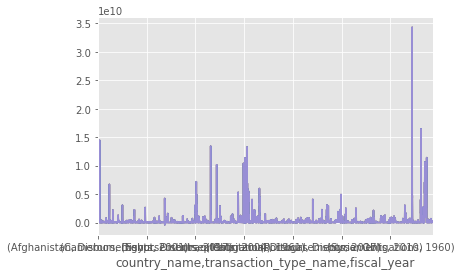

In [33]:

#mon_contrib_wide = mon_contrib.pivot(index='date', columns='cand_nm', values='contb_receipt_amt')
reduced_sums.plot()
plt.show()

#Yoy funding 

#bar charts by country, maybe region

# us budget or gdp, and have foreign aid as a proportion - break by military and non-military (pay attention to inflation)

#size of receiving country population - world bank

#look at from standpoint of years, trend analysis (trend line) - money by year or decade, perhaps by spending level or type

#area chart - kind in plot box, area

Question 3: How has US foreign aid on democratic development (DRG) been spent?
U.S. spending on democracy, human rights and governance by democratic status
By population size (per capita) of recipient country
By GDP per capita in recipient country
Totals by democratic status of recipient regions
Totals by democratic status of recipient countries
By the 10 countries with longest period of within the following democratic status:
>Not Free
>Partly Free
>Free
By GDP status of recipient countries
By Gini status of recipient countries
By HDI status of recipient countries

In [12]:
fhfawb_pickle_df.columns

Index(['FH_Score', 'year', 'country', 'FH_value', 'date', 'gdppc', 'gini',
       'nat', 'pop', 'voice', 'wb_code', 'GEC', 'ISO3166_S', 'ISO3166_N',
       'internet', 'country_id', 'country_y', 'region_id', 'region_name',
       'income_group_id', 'income_group_name', 'income_group_acronym',
       'implementing_agency_id', 'implementing_agency_acronym',
       'implementing_agency_name', 'implementing_subagency_id',
       'subagency_acronym', 'subagency_name', 'channel_category_id',
       'channel_category_name', 'channel_subcategory_id',
       'channel_subcategory_name', 'channel_id', 'channel_name',
       'dac_category_id', 'dac_category_name', 'dac_sector_code',
       'dac_sector_name', 'dac_purpose_code', 'dac_purpose_name',
       'funding_account_id', 'funding_account_name', 'funding_agency_id',
       'funding_agency_name', 'funding_agency_acronym',
       'assistance_category_id', 'assistance_category_name',
       'aid_type_group_id', 'aid_type_group_name', 'activity_id

In [24]:

#def update_xlabels(ax):
#    xlabels = [format(label, ',.0f') for label in ax.get_xticks()]
#    ax.set_xticklabels(xlabels)

#update_xlabels(ax)
#update_xlabels(ax2)

Y_filt = fhfawb_pickle_df[(fhfawb_pickle_df.year > 1972) ]
s_dac_cat= Y_filt \
.groupby(['dac_sector_name'])[['constant_amount','FH_value']].sum() \
.constant_amount.sort_values(ascending=False)
s_dac_cat.head(10)

Y_filt_df = pd.DataFrame(Y_filt)
Y_filt_df.head()


#s_agency_rank = df_agency_cat.rank(ascending=False).astype(int)
#s_agency_rank = df_agency_cat.rank(ascending=False).astype(int)

#fhfawb_pickle_df

#top_agency = pd.DataFrame(s_agency_rank)

#top_agency['agency'] = s_agency_cat

#top_agency = top_agency.reset_index() \
#.rename(columns={'constant_amount':'rank', 'implementing_agency_acronym': 'agency', 'agency':'constant_amount'}) \
#.set_index('rank')

#top_agency.head(10)





,FH_Score,year,country,FH_value,date,gdppc,gini,nat,pop,voice,...,activity_start_date,activity_end_date,transaction_type_id,transaction_type_name,current_amount,constant_amount,USG_sector_id,USG_sector_name,framework,submission_id
21,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$19,500,000.00","$84,576,112.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
22,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$7,600,000.00","$32,962,998.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
23,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$6,500,000.00","$28,192,037.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
24,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$3,600,000.00","$15,614,052.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00
25,PR,1973,Afghanistan,7,1973-01-01,$nan,$nan,$0.77,"$12,027,822.00",$nan,...,NaN,NaN,$2.00,Obligations,"$1,400,000.00","$6,072,131.00",$25.00,Macroeconomic Foundation for Growth,NaN,$1.00


In [55]:
country_gdppc = pd.DataFrame(Y_filt.copy())
country_gdppc = pd.DataFrame(country_gdppc.groupby(["country", "gdppc", "pop", "year"]).constant_amount.sum())


#country_gdppc.type

#country_gdppc[gdppc].type
country_gdppc.reset_index(inplace = True)
country_gdppc = country_gdppc.sort_values(["country", "year"], ascending = [True, False])
country_gdppc = country_gdppc.reset_index(drop = True)

country_gdppc.columns

country_gdppc["gdppc"] = country_gdppc["gdppc"].astype(float)
country_gdppc["GDP"] = country_gdppc["gdppc"] * country_gdppc["pop"]


country_gdppc["Aid % of GDP"] = country_gdppc["constant_amount"] / country_gdppc["GDP"]


country_gdppc["Aid % of GDP Change"] = country_gdppc["Aid % of GDP"] / country_gdppc["Aid % of GDP"].shift(-1) - 1

country_gdppc["Aid % of GDP"] = country_gdppc["Aid % of GDP"].apply(as_percent)
country_gdppc["Aid % of GDP Change"] = country_gdppc["Aid % of GDP Change"].apply(as_percent)


country_gdppc.head(20)
#country_gdppc

,country,gdppc,pop,year,constant_amount,GDP,Aid % of GDP,Aid % of GDP Change
0,Afghanistan,"$1,739.58","$34,656,032.00",2016,"$27,852,409,461.00","$60,287,050,236.92",46.20%,-47.93%
1,Afghanistan,"$1,747.98","$33,736,494.00",2015,"$52,326,294,588.00","$58,970,664,733.65",88.73%,17.51%
2,Afghanistan,"$1,780.38","$32,758,020.00",2014,"$44,038,080,552.00","$58,321,801,149.60",75.51%,-29.45%
3,Afghanistan,"$1,814.16","$31,731,688.00",2013,"$61,612,811,316.00","$57,566,226,632.68",107.03%,-18.24%
4,Afghanistan,"$1,839.27","$30,696,958.00",2012,"$73,906,013,382.00","$56,460,103,813.60",130.90%,-19.69%
5,Afghanistan,"$1,660.74","$29,708,599.00",2011,"$80,422,573,140.00","$49,338,254,430.56",163.00%,22.55%
6,Afghanistan,"$1,614.26","$28,803,167.00",2010,"$61,844,516,349.00","$46,495,656,381.91",133.01%,-2.37%
7,Afghanistan,"$1,531.17","$28,004,331.00",2009,"$58,420,409,697.00","$42,879,503,310.65",136.24%,-16.74%
8,Afghanistan,"$1,298.14","$27,294,031.00",2008,"$57,981,280,464.00","$35,431,559,620.92",163.64%,64.53%
9,Afghanistan,"$1,284.78","$26,616,792.00",2007,"$34,013,125,317.00","$34,196,594,611.88",99.46%,32.95%


In [22]:


region_gdppc = pd.DataFrame(Y_filt.copy())
region_gdppc = pd.DataFrame(region_gdppc.groupby(["region_name", "gdppc", "pop", "year"]).constant_amount.sum())


#country_gdppc.type

#country_gdppc[gdppc].type
region_gdppc.reset_index(inplace = True)

region_gdppc.columns

region_gdppc["gdppc"] = region_gdppc["gdppc"].astype(float)
region_gdppc["GDP"] = region_gdppc["gdppc"] * region_gdppc["pop"]


region_gdppc["GDP_Over_Aid"] = region_gdppc["GDP"] / region_gdppc["constant_amount"].sum()
region_gdppc["GDP_Over_Aid"] = region_gdppc["GDP_Over_Aid"].apply(as_percent)



region_gdppc.head(20)
#country_gdppc

,region_name,gdppc,pop,year,constant_amount,GDP,GDP_Over_Aid
0,East Asia and Oceania,$927.03,"$43,237,792.00",1995,"$443,889.00","$40,082,543,585.33",1.13%
1,East Asia and Oceania,$974.23,"$43,793,310.00",1996,"$2,309,553.00","$42,664,947,772.41",1.20%
2,East Asia and Oceania,"$1,015.03","$9,968,275.00",1993,"$262,872,765.00","$10,118,108,201.90",0.28%
3,East Asia and Oceania,"$1,015.88","$44,371,525.00",1997,"$11,775,723.00","$45,076,192,691.99",1.27%
4,East Asia and Oceania,"$1,061.40","$44,959,935.00",1998,"$2,257,914.00","$47,720,458,236.56",1.34%
5,East Asia and Oceania,"$1,070.13","$10,315,376.00",1994,"$139,554,948.00","$11,038,801,866.61",0.31%
6,East Asia and Oceania,"$1,102.92","$10,653,558.00",1995,"$199,517,847.00","$11,750,021,140.68",0.33%
7,East Asia and Oceania,"$1,128.02","$10,980,273.00",1996,"$136,190,826.00","$12,385,972,161.88",0.35%
8,East Asia and Oceania,"$1,158.12","$11,295,880.00",1997,"$165,458,283.00","$13,082,038,149.07",0.37%
9,East Asia and Oceania,"$1,162.59","$45,539,435.00",1999,"$61,594,308.00","$52,943,524,418.52",1.49%
